In [75]:
import numpy as np
import random
from matplotlib import pyplot as plt


In [33]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [34]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,1,1,0]

Derivadas parciales

In [45]:
def L_w_1_1_1(y, y_pred, w_1_1_2, z_1_1, x_1):
    return -2 * (y-y_pred) * w_1_1_2 * sigmoid(z_1_1) * (1 - sigmoid(z_1_1)) * x_1

def L_w_1_2_1(y, y_pred, w_1_1_2, z_1_1, x_2):
    return -2 * (y-y_pred) * w_1_1_2 * sigmoid(z_1_1) * (1 - sigmoid(z_1_1)) * x_2

def L_b_1_1(y, y_pred, w_1_1_2, z_1_1):
    return -2 * (y-y_pred) * w_1_1_2 * sigmoid(z_1_1) * (1 - sigmoid(z_1_1))

def L_w_2_1_1(y, y_pred, w_2_1_2, z_2_1, x_1):
    return -2 * (y-y_pred) * w_2_1_2 * sigmoid(z_2_1) * (1 - sigmoid(z_2_1)) * x_1

def L_w_2_2_1(y, y_pred, w_2_1_2, z_2_1, x_2):
    return -2 * (y-y_pred) * w_2_1_2 * sigmoid(z_2_1) * (1 - sigmoid(z_2_1)) * x_2

def L_b_2_1(y, y_pred, w_2_1_2, z_2_1):
    return -2 * (y-y_pred) * w_2_1_2 * sigmoid(z_2_1) * (1 - sigmoid(z_2_1))

def L_w_1_1_2(y, y_pred, a_1_1):
    return -2 * (y-y_pred) * a_1_1

def L_w_1_2_2(y, y_pred, a_2_1):
    return -2 * (y-y_pred) * a_2_1

def L_b_1_2(y, y_pred):
    return -2 * (y-y_pred)

Error MSE

In [159]:
def loss(y, y_pred):
    return (y - y_pred)**2

SGD

In [166]:
def sgd(X, y):
    plt.clf()
    W11_1 = random.uniform(0, 1)
    W12_1 = random.uniform(0, 1)
    b1_1 = random.uniform(0, 1)

    W21_1 = random.uniform(0, 1)
    W22_1 = random.uniform(0, 1)
    b2_1 = random.uniform(0, 1)

    W11_2 = random.uniform(0, 1)
    W12_2 = random.uniform(0, 1)
    b1_2 = random.uniform(0, 1)

    n_epochs = 1000
    learning_rate = 0.1

    errors = []
    
    for epoch in range(n_epochs):
        for x, yi in zip(X, y):
            # Paso forward
            z1_1 = W11_1 * x[0] + W12_1 * x[1] + b1_1
            z2_1 = W21_1 * x[0] + W22_1 * x[1] + b2_1
            a1_1 = sigmoid(z1_1)
            a2_1 = sigmoid(z2_1)

            z1_2 = W11_2 * a1_1 + W12_2 * a2_1 + b1_2

            # Error
            error = loss(yi, z1_2)

            # Actualizamos los parámetros
            W11_1 = W11_1 - learning_rate * L_w_1_1_1(yi, z1_2, W11_2, z1_1, x[0])
            W12_1 = W12_1 - learning_rate * L_w_1_2_1(yi, z1_2, W11_2, z1_1, x[1])
            b1_1 = b1_1 - learning_rate * L_b_1_1(yi, z1_2, W11_2, z1_1) 

            W21_1 = W21_1 - learning_rate * L_w_2_1_1(yi, z1_2, W12_2, z2_1, x[0])
            W12_1 = W12_1 - learning_rate * L_w_2_2_1(yi, z1_2, W12_2, z2_1, x[1])
            b2_1 = b2_1 - learning_rate * L_b_2_1(yi, z1_2, W12_2, z2_1) 

            W11_2 = W11_2 - learning_rate * L_w_1_1_2(yi, z1_2, a1_1)
            W12_2 = W12_2 - learning_rate * L_w_1_2_2(yi, z1_2, a2_1)
            b1_2 = b1_2 - learning_rate * L_b_1_2(yi, z1_2)
        
        # Calculo el error mse
        mse = 0
        for x, yi in zip(X, y):
            z1_1 = W11_1 * x[0] + W12_1 * x[1] + b1_1
            z2_1 = W21_1 * x[0] + W22_1 * x[1] + b2_1
            a1_1 = sigmoid(z1_1)
            a2_1 = sigmoid(z2_1)

            y_pred = W11_2 * a1_1 + W12_2 * a2_1 + b1_2
            mse = mse + (yi - y_pred) ** 2

        mse = mse / 4
        errors.append(mse)

    print("W11_1")
    print(W11_1)
    print("W12_1")
    print(W12_1)
    print("b1_1")
    print(b1_1)

    print("W21_1")
    print(W21_1)
    print("W22_1")
    print(W22_1)
    print("b2_1")
    print(b2_1)

    print("W11_2")
    print(W11_2)
    print("W12_2")
    print(W12_2)
    print("b2_2")
    print(b1_2)

    li = list(zip(range(n_epochs), errors))
    plt.plot(range(n_epochs), errors)
    plt.ylabel('mse')
    plt.xlabel('epochs')

    plt.show()



W11_1
3.783552117077669
W12_1
4.283987509463809
b1_1
0.026607949738583006
W21_1
-3.5361074549008444
W22_1
0.8380743975719367
b2_1
-1.8915612023759873
W11_2
1.28456981228439
W12_2
2.397369661630038
b2_2
-0.9180745436309418


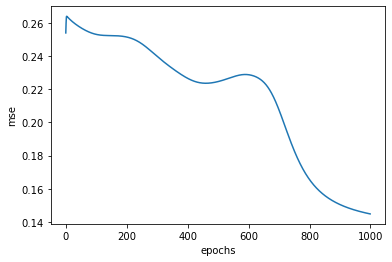

In [167]:
sgd(X,y)